# STAT 301 Group 7 Final Report

In [ ]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyr)
library(readr)
library(caret)
library(ggplot2)
library(GGally)
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(modelr)
library(car)
library(caTools)
library(pROC)
})

## **(1) Introduction**
Heart diseases, also known as cardiovascular diseases, involves a range of conditions such as heart attack, arrhythmia, heart failure that affect the heart and blood vessels. It is a leading global health concern, responsible for a significant portion of mortality and morbidity worldwide. Most of the heart diseases are caused by plaque build up in the walls of the arteries which narrows the arteries, making it harder for blood to flow through (American Heart Association, 2024). There are several factors including age, sex, cholestrol level, blood pressure, heart rate, breathe rate that can contribute to presence of heart disease.

Diseases such as heart failure do not have any cure but there are various treatments that can keep the conditions under control making early detection crucial in these situations (Booth, 2023). However, due to the gradual onset of symptoms, they are often mistaken to be normal signs of aging, making early detection tricky. Therefore, in order to detect presence of cardiovascular disease, we need to understand how each factor relates to it.
> This leads to to our question: **"How do various clinical factors affect the presence of heart disease?"**

**Dataset Information**

The heart disease Cleveland Clinic Foundation dataset originates from the UCI Machine Learning Repository.
The dataset consists of 303 observations and 14 attributes, including patient demographics, clinical features, and the presence of heart disease. The data was collected through clinical trials and medical examinations aimed at diagnosing and understanding heart disease. The primary purpose of the dataset is to enable the development of predictive models and perform statistical analysis to better understand the factors contributing to heart disease.

Among many variables available, we will use the following:
1. `age`: age in years
2. `sex`: sex
    * 1 = male
    * 0 = female
3. `cp`: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. `restecg`: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina
    * 1 = yes
    * 0 = no
10. `oldpeak` = ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. `ca`: number of major vessels (0-3) colored by flourosopy
13. `thal`:
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect
14. `num` :Diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing ,
    - Value 1: > 50% diameter narrowing   
    * 0 = No presence of heart disease (< 50% diameter narrowing),
    * 1 = Presence of heart disease (> 50% diameter narrowing),
    * 2 = Presence of heart disease with more severe narrowing,
    * 3 = Presence of heart disease with even more severe narrowing,
    * 4 = Presence of heart disease with the most severe narrowing
---

## **(2) Methods and Results**

### a) Exploratory Data Analysis

#### First, we load the dataset:

In [ ]:
# Code written by Yang
heart_disease_data <- read.csv("processed.cleveland.data", header=FALSE)

head(heart_disease_data)

V1 V2 V3 V4  V5  V6 V7 V8  V9 V10 V11 V12 V13 V14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

*Table 1*

In [ ]:
dim(heart_disease_data)
str(heart_disease_data)

[1] 303  14

'data.frame':	303 obs. of  14 variables:
 $ V1 : num  63 67 67 37 41 56 62 57 63 53 ...
 $ V2 : num  1 1 1 1 0 1 0 0 1 1 ...
 $ V3 : num  1 4 4 3 2 2 4 4 4 4 ...
 $ V4 : num  145 160 120 130 130 120 140 120 130 140 ...
 $ V5 : num  233 286 229 250 204 236 268 354 254 203 ...
 $ V6 : num  1 0 0 0 0 0 0 0 0 1 ...
 $ V7 : num  2 2 2 0 2 0 2 0 2 2 ...
 $ V8 : num  150 108 129 187 172 178 160 163 147 155 ...
 $ V9 : num  0 1 1 0 0 0 0 1 0 1 ...
 $ V10: num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ V11: num  3 2 2 3 1 1 3 1 2 3 ...
 $ V12: chr  "0.0" "3.0" "2.0" "0.0" ...
 $ V13: chr  "6.0" "3.0" "7.0" "3.0" ...
 $ V14: int  0 2 1 0 0 0 3 0 2 1 ...


#### Next, we clean and wrangle the dataset:

We can see that there are a lot of categorical variables in this dataset. However, our current dataset has many of these categorical columns labeled as numerical which will cause inaccuracies with our model. To fix this, we can change these columns to categorical using `as.factor()`. Since `num` is our response variable and we need it to be binomial, we should also change the values in `num` to be "No" for a values of 0 and "Yes" for values 1-4.

In [ ]:
# Code written by Yang
colnames(heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                 "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

#Since ca and thal include the "?" level , so we remove the "?" in the dataset
heart_disease_data <- heart_disease_data %>%
  filter(ca != "?" & thal != "?")

#since the response vaiable has 4 levels, so we convert  the num variable from a multi-level categorical variable (with levels 0, 1, 2, 3, 4) into a binary variable
heart_disease_data <- heart_disease_data %>%
    mutate(sex = as.factor(sex)) %>%
    mutate(cp = as.factor(cp)) %>%
    mutate(fbs = as.factor(fbs)) %>%
    mutate(restecg = as.factor(restecg)) %>%
    mutate(exang = as.factor(exang)) %>%
    mutate(slope = as.factor(slope)) %>%
    mutate(ca = as.factor(ca)) %>%
    mutate(thal = as.factor(thal)) %>%
    mutate(num = as.factor(if_else(num == 0, "No", "Yes")))

head(heart_disease_data,10)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1  63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2  67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3  67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
4  37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0 
5  41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0 
6  56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0 
7  62  0   4  140      268  0   2       160     0     3.6     3     2.0 3.0 
8  57  0   4  120      354  0   0       163     1     0.6     1     0.0 3.0 
9  63  1   4  130      254  0   2       147     0     1.4     2     1.0 7.0 
10 53  1   4  140      203  1   2       155     1     3.1     3     0.0 7.0 
   num
1  No 
2  Yes
3  Yes
4  No 
5  No 
6  No 
7  Yes
8  No 
9  Yes
10 Yes

*Table 2*

In [ ]:
dim(heart_disease_data)
summary(heart_disease_data)

[1] 297  14

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 96   1: 23   Min.   : 94.0   Min.   :126.0   0:254  
 1st Qu.:48.00   1:201   2: 49   1st Qu.:120.0   1st Qu.:211.0   1: 43  
 Median :56.00           3: 83   Median :130.0   Median :243.0          
 Mean   :54.54           4:142   Mean   :131.7   Mean   :247.4          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:276.0          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak      slope     ca       thal    
 0:147   Min.   : 71.0   0:200   Min.   :0.000   1:139   0.0:174   3.0:164  
 1:  4   1st Qu.:133.0   1: 97   1st Qu.:0.000   2:137   1.0: 65   6.0: 18  
 2:146   Median :153.0           Median :0.800   3: 21   2.0: 38   7.0:115  
         Mean   :149.6           Mean   :1.056           3.0: 20            
         3rd Qu.:166.0           3rd Qu.:1.600                              
         Max.   :202.0     

*Table 3*

To explore the dataset and address the question of interest, we propose using corrleation matrix，heatmap histograms for numerical variables and bar plots for categorical variables. These plots will help us understand the distribution of each covariates and response variable, and their potential relationship with the presence of heart disease. we also use the `ggpairs()` which is a good plot , because it shows plots and correlation index of the association of numerical variables with the response and other covariates, it can be useful to check for collinearity.

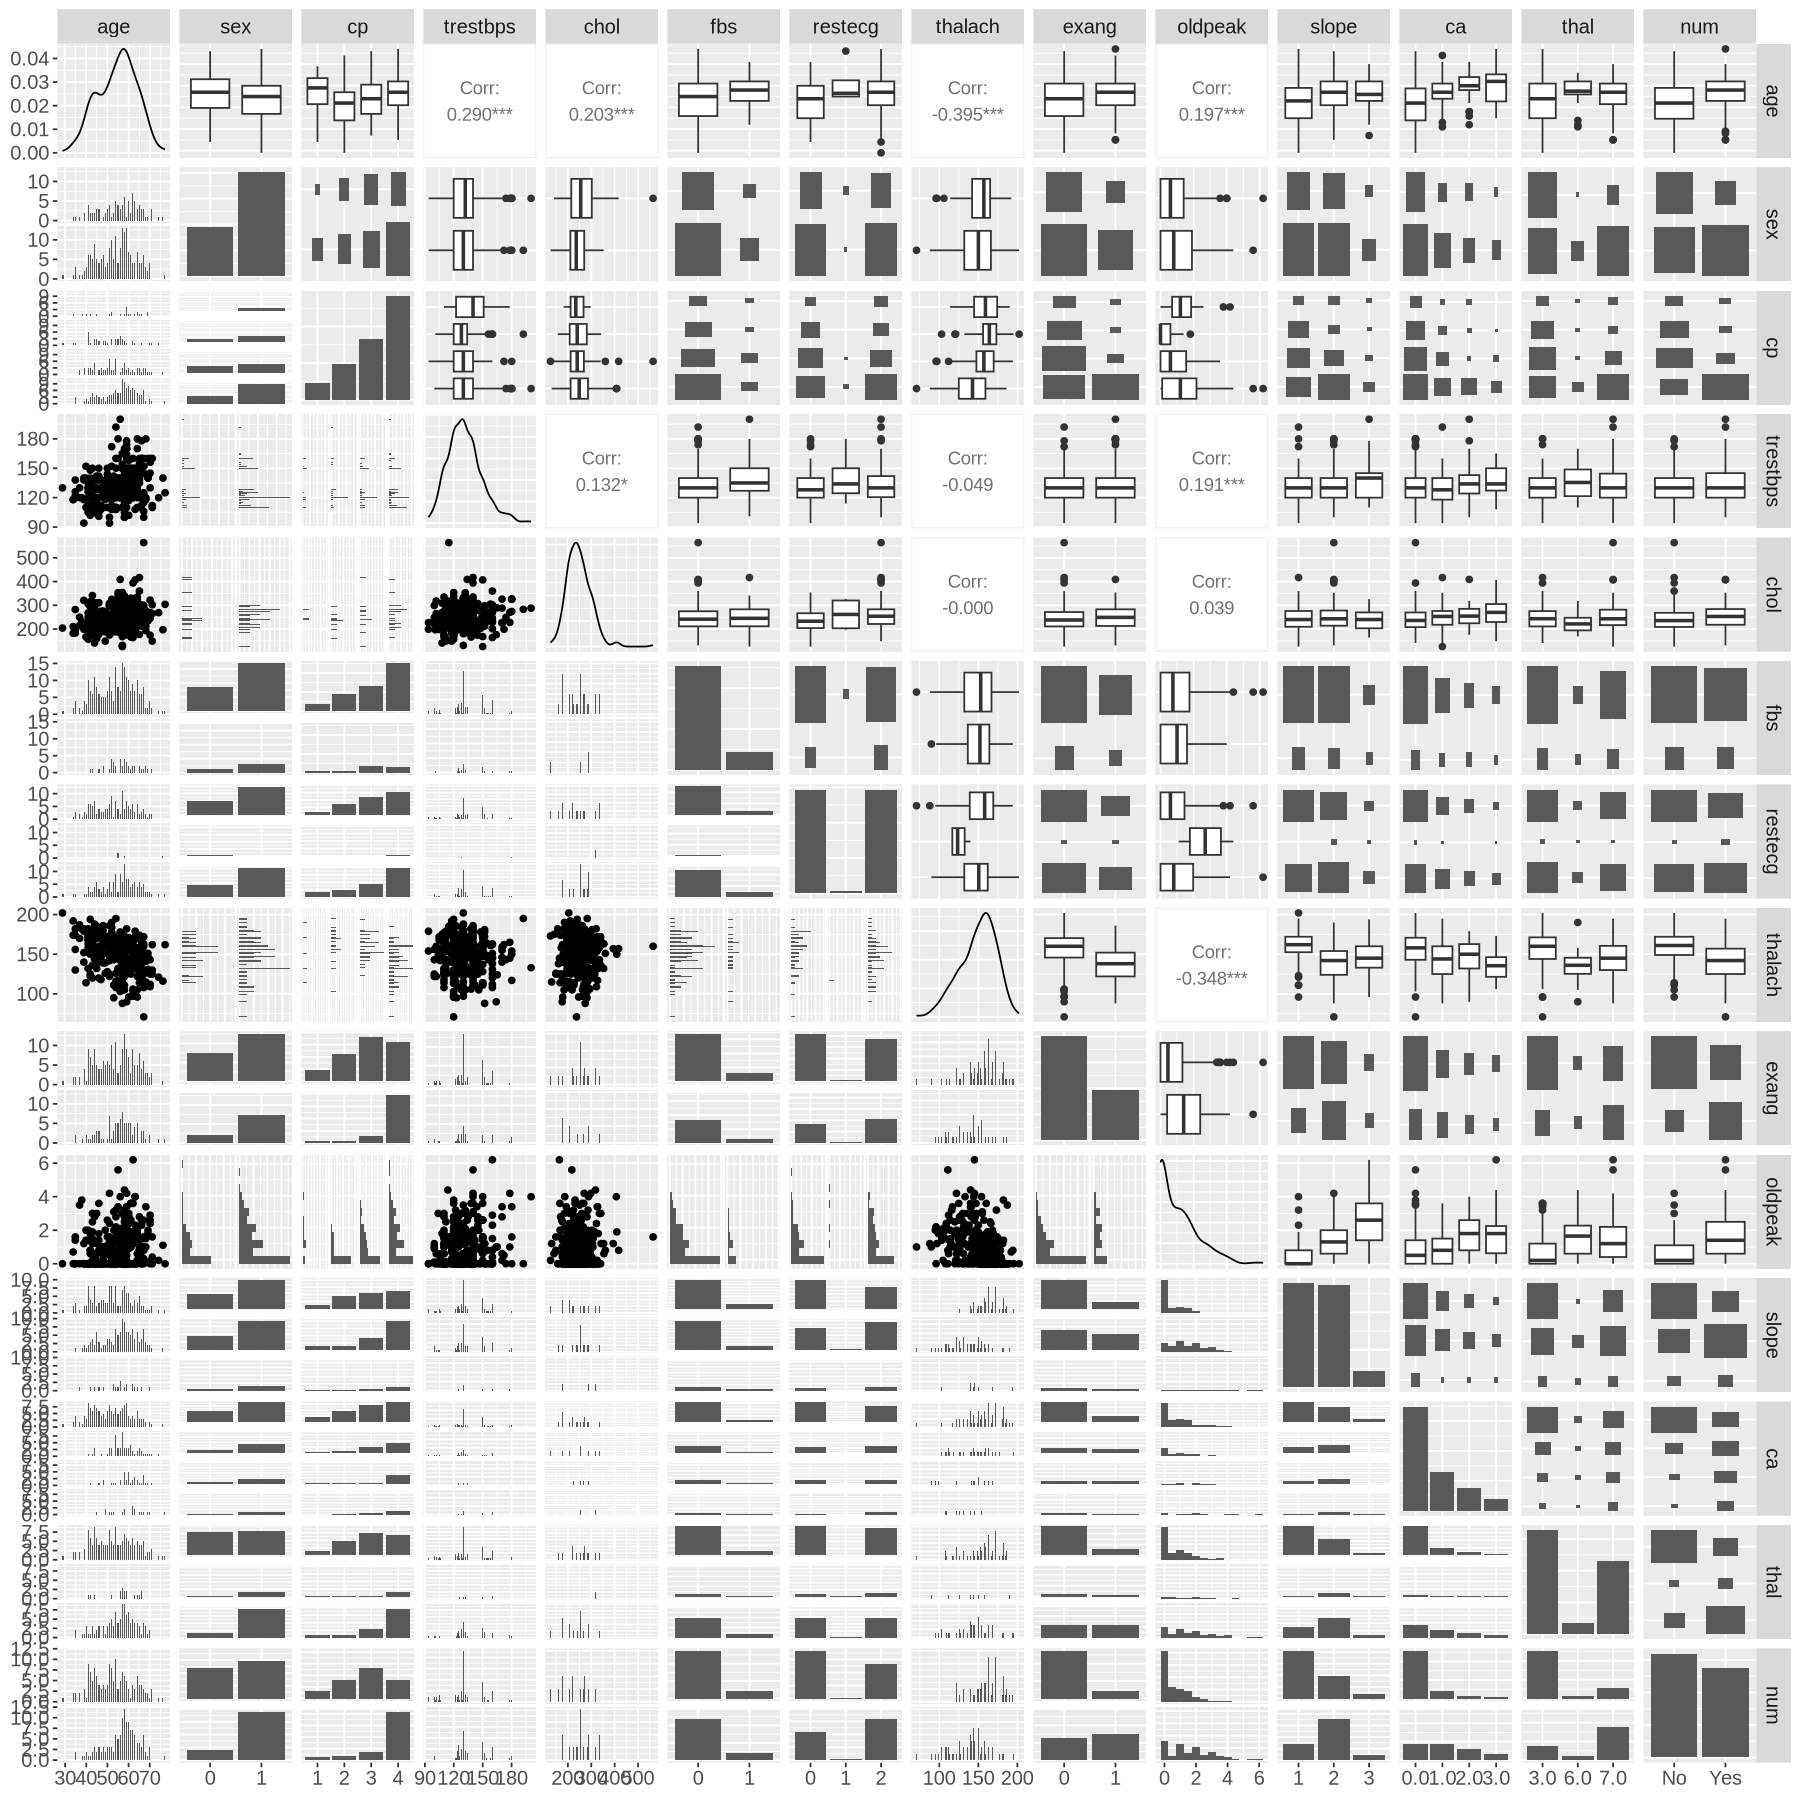

In [ ]:
# Code written by Yang
options(repr.plot.width = 15, repr.plot.height = 15)

suppressWarnings({
heart_disease_pair_plots <-
   heart_disease_data %>%
   ggpairs(progress = FALSE,lower = list(combo = wrap("facethist", binwidth = 0.5))) +
   theme(
     text = element_text(size = 15),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
})
heart_disease_pair_plots

*Figure 1*

In [ ]:
# Code written by Yang
corr_matrix_heart_disease <-
    heart_disease_data %>%
    select(age,trestbps,chol,thalach,oldpeak) %>%
    cor() %>%
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
corr_matrix_heart_disease

var1     var2     corr         
1  age      age       1.000000e+00
2  age      trestbps  2.904763e-01
3  age      chol      2.026435e-01
4  age      thalach  -3.945629e-01
5  age      oldpeak   1.971226e-01
6  trestbps age       2.904763e-01
7  trestbps trestbps  1.000000e+00
8  trestbps chol      1.315357e-01
9  trestbps thalach  -4.910766e-02
10 trestbps oldpeak   1.912431e-01
11 chol     age       2.026435e-01
12 chol     trestbps  1.315357e-01
13 chol     chol      1.000000e+00
14 chol     thalach  -7.456799e-05
15 chol     oldpeak   3.859579e-02
16 thalach  age      -3.945629e-01
17 thalach  trestbps -4.910766e-02
18 thalach  chol     -7.456799e-05
19 thalach  thalach   1.000000e+00
20 thalach  oldpeak  -3.476400e-01
21 oldpeak  age       1.971226e-01
22 oldpeak  trestbps  1.912431e-01
23 oldpeak  chol      3.859579e-02
24 oldpeak  thalach  -3.476400e-01
25 oldpeak  oldpeak   1.000000e+00

*Table 4*

##### Plot the heatmatrix to show the correlation between the numerical variables in the data set

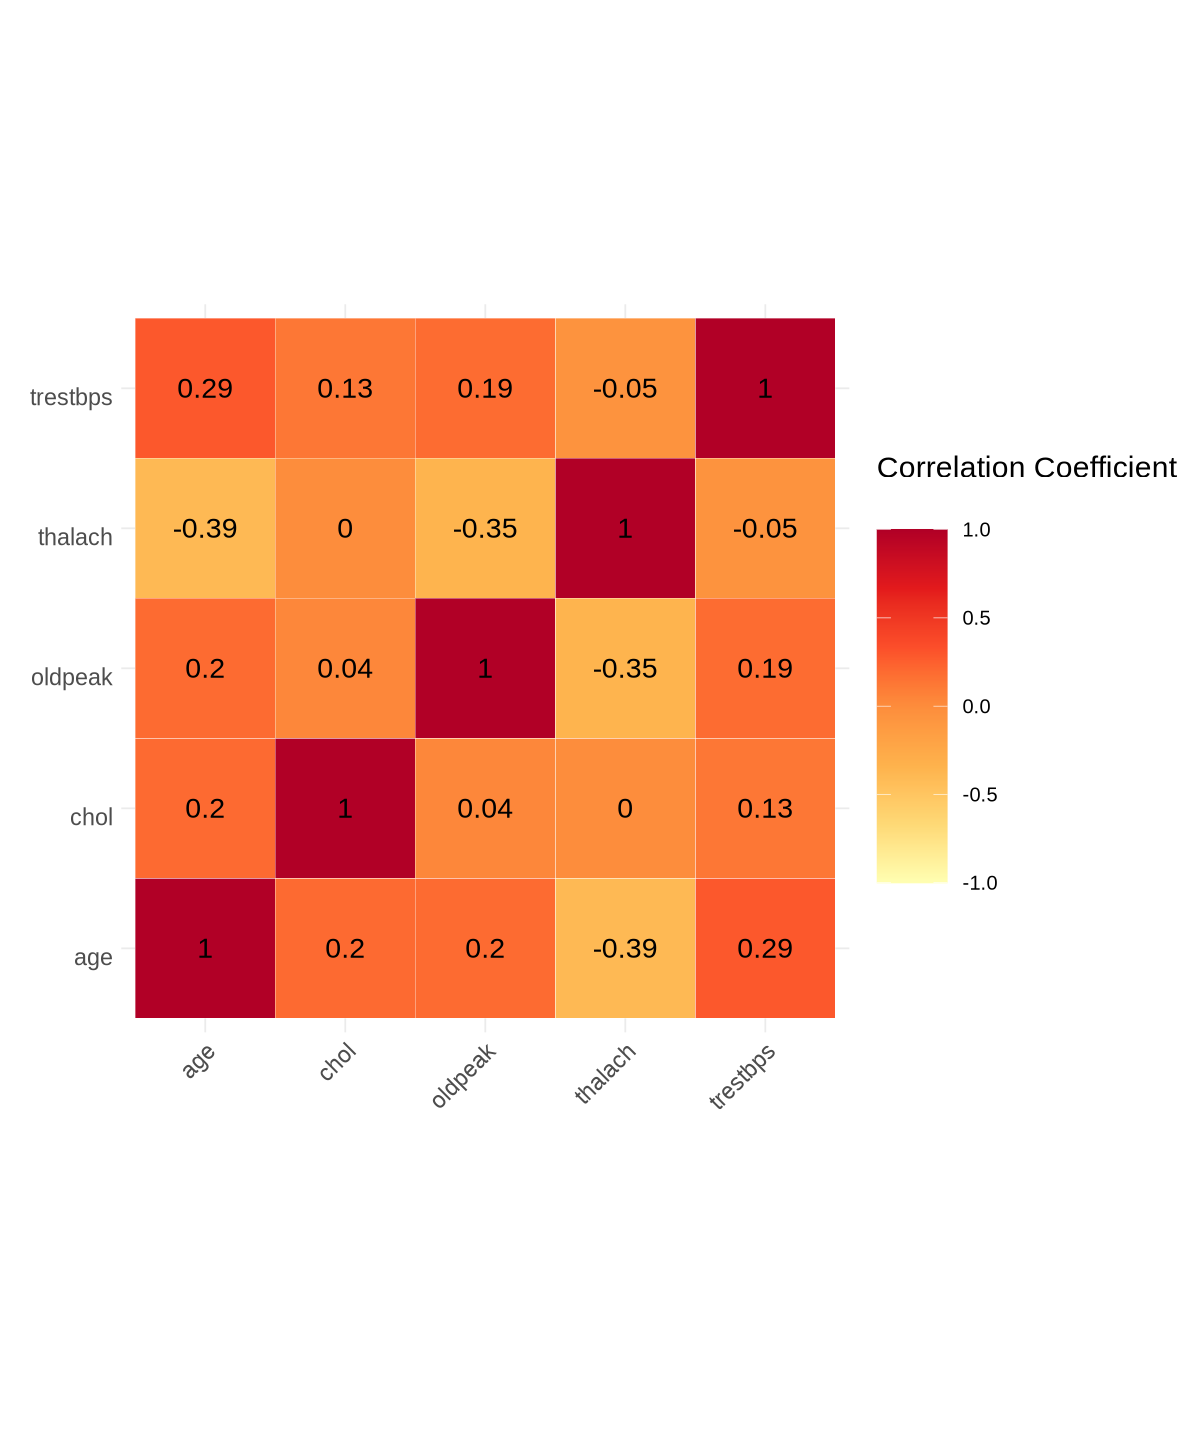

In [ ]:
# Code written by Yang
options(repr.plot.width = 10, repr.plot.height = 12)
plot_corr_matrix_heart_disease <-
   corr_matrix_heart_disease %>%
   ggplot(aes(var1, var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation Coefficient \n",
       palette =  "YlOrRd",
       direction = 1,
       limits = c(-1,1)
     ) +
     labs(x = "", y = "") +
     theme_minimal() +
     theme(
         axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
         axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
         legend.title = element_text(size = 18),
         legend.text = element_text(size = 12),
         legend.key.size = unit(1.5, "cm")
     ) +
     coord_fixed() +
    geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_heart_disease

*Figure 2*

##### Plot the distribution of the response variable to make sure there are no extreme imbalances

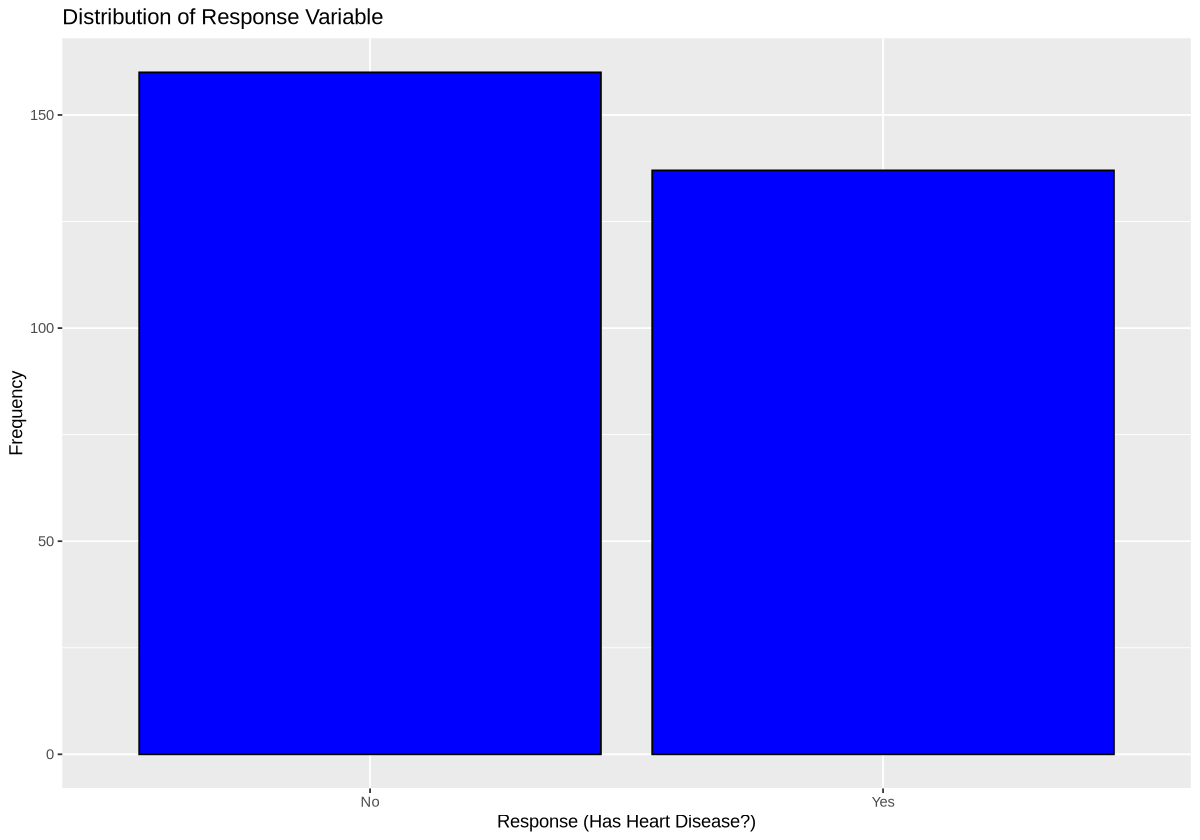

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(heart_disease_data, aes(x = num)) +
geom_bar(fill = "blue", color = "black", stat = "count") +
labs(title = "Distribution of Response Variable", x = "Response (Has Heart Disease?)", y = "Frequency")

*Figure 3*

##### Histograms provide a sense of the distribution and range of numerical variables, highlighting potential outliers and the central tendency

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


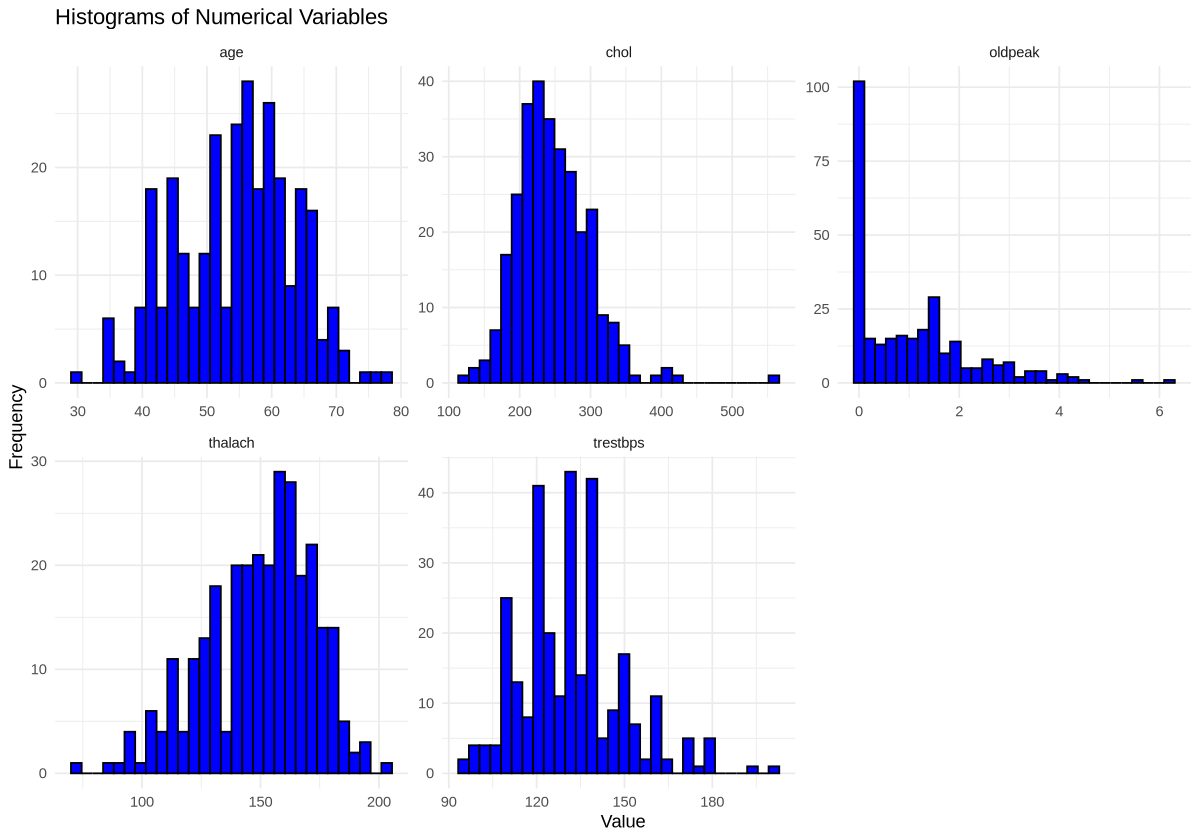

In [ ]:
# Code written by Yang, edited by Jason
heart_disease_data %>%
  select(age, trestbps, chol, thalach, oldpeak) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(x = Value)) +
  geom_histogram(fill = "blue", color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Histograms of Numerical Variables", x = "Value", y = "Frequency")

*Figure 4*

##### Bar plots show the frequency distribution of categorical variables, helping to identify common categories and potential imbalances in the data.

Warning message:
“attributes are not identical across measure variables; they will be dropped”


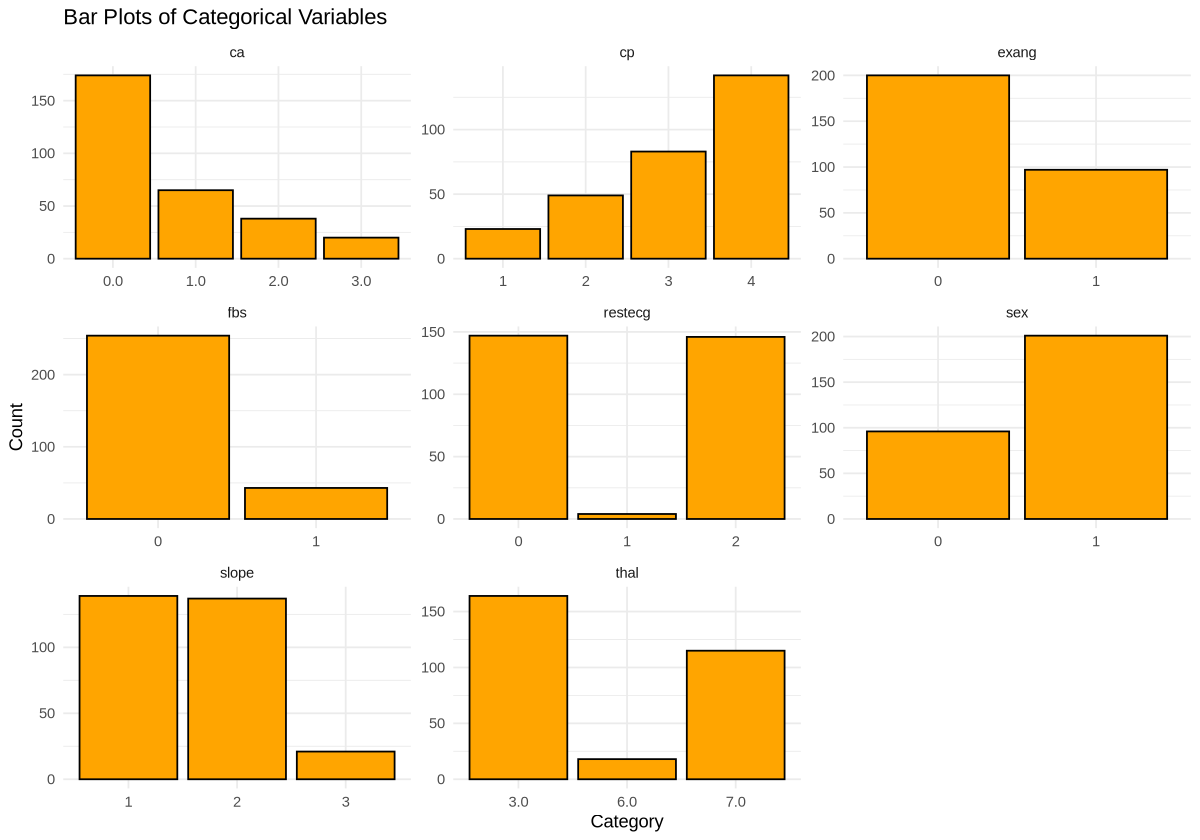

In [ ]:
# Code written by Yang
heart_disease_data %>%
  select(sex, cp, fbs, restecg, exang, slope, ca, thal) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(x = as.factor(Value))) +
  geom_bar(fill = "orange", color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Bar Plots of Categorical Variables", x = "Category", y = "Count")

*Figure 5*

##### Box plots illustrate how the numerical variables differ between patients with and without heart disease, highlighting any significant differences.

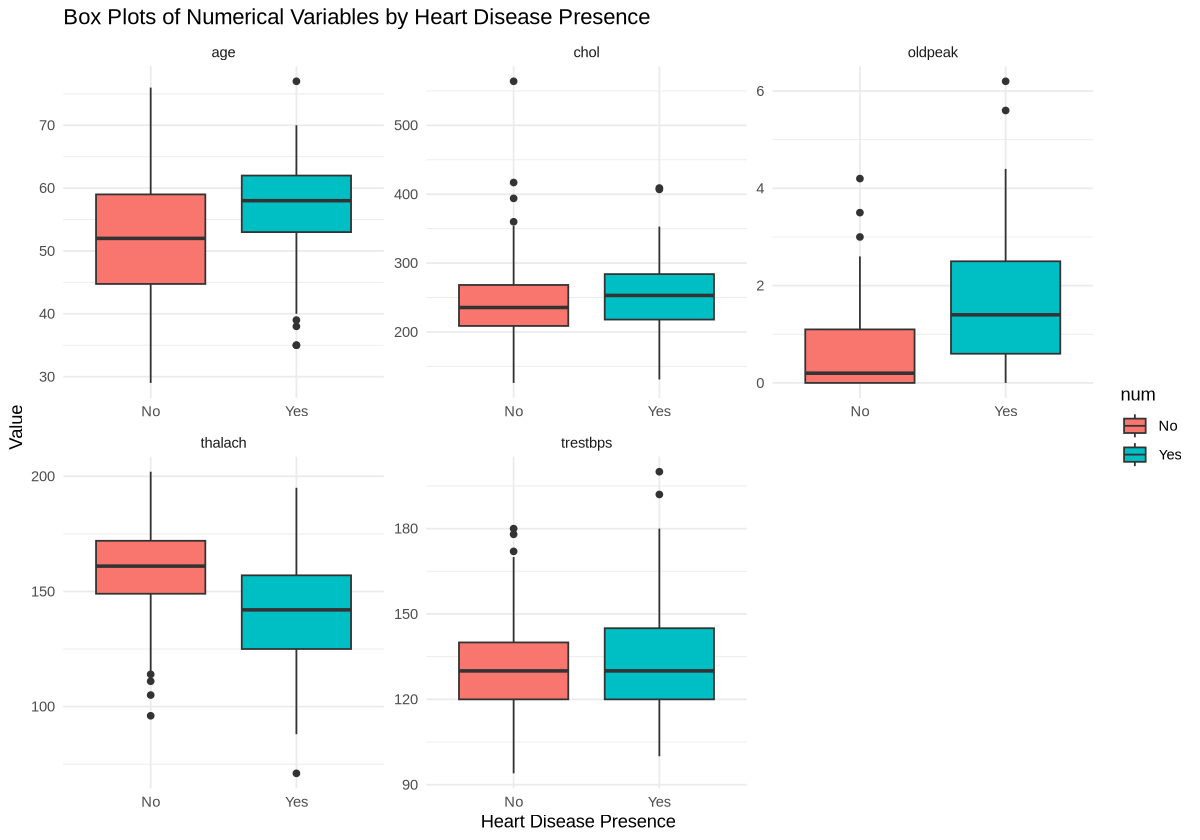

In [ ]:
# Code written by Yang
heart_disease_data %>%
  select(age, trestbps, chol, thalach, oldpeak, num) %>%
  gather(key = "Variable", value = "Value", -num) %>%
  ggplot(aes(x = num, y = Value, fill = num)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Box Plots of Numerical Variables by Heart Disease Presence", x = "Heart Disease Presence", y = "Value")

*Figure 6*

### **2.b) Methods: Plan**

After loading and tidying the data, we first used `ggpairs`, the correlation matrix and the visualized heatmap (Figure 1, Table 4 and Figure 2 respectively) to help determine if there was any multicollinearity in our dataset. From Figure 2, we can see that the correlation coefficient between all covariates are relatively low, indicating that there is likely no multicollinearity in our dataset. <br>

The remaining plots (Figure 3 to Figure 6) are to help us better understand distributions of the data and maybe get a glimpse of patterns that could indicate heart disease. From Figure 3, we can see that we have a relatively equal amount of people with and without heart disease in the dataset. From Figure 6, we can see that the values of `age`, `oldpeak`, and `thalach` have a noticeable difference between patients without heart disease and patients with heart disease.

Since our target variable is either `Yes` or `No`, a logistic regression model would suit our question well. Because we established that our dataset has no multicollinearity, we can use all covariates in our model. We will be using a significance level of $\alpha$ = 0.05. Since we will be evaluating the model later on, we will do a 70-30% split on the dataset. <br>

In [ ]:
#Setting seed to make the results reproducible
set.seed(777)

#splitting the data into training and testing sets (70% for training and 30% for testing)
split <- sample.split(heart_disease_data$num, SplitRatio = 0.7)

heart_disease_train <- subset(heart_disease_data, split == TRUE)
heart_disease_test <- subset(heart_disease_data, split == FALSE)

nrow(heart_disease_train)
nrow(heart_disease_test)

[1] 208

[1] 89

Because there are 13 covariates in our dataset, performing an individual t-test on every single one of them may lead to many false discoveries for our inference question. Thus, we will first use forward selection to remove some variables in hopes to mitigate this issue.

In [ ]:
null_model <- glm(num ~ 1, data = heart_disease_train, family = binomial)
full_model <- glm(num ~ ., data = heart_disease_train, family = binomial)
forward_selection_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")
summary(forward_selection_model)

Start:  AIC=289.12
num ~ 1

           Df Deviance    AIC
+ ca        3   212.51 220.51
+ cp        3   214.45 222.45
+ thal      2   218.09 224.09
+ oldpeak   1   249.32 253.32
+ thalach   1   249.95 253.95
+ exang     1   252.30 256.30
+ slope     2   264.78 270.78
+ sex       1   272.29 276.29
+ age       1   272.46 276.46
+ trestbps  1   275.32 279.32
+ restecg   2   280.64 286.64
<none>          287.12 289.12
+ chol      1   285.73 289.73
+ fbs       1   286.71 290.71

Step:  AIC=220.51
num ~ ca

           Df Deviance    AIC
+ cp        3   161.83 175.83
+ thal      2   173.03 185.03
+ exang     1   189.90 199.90
+ oldpeak   1   194.33 204.33
+ thalach   1   194.48 204.48
+ slope     2   195.54 207.54
+ sex       1   202.00 212.00
+ trestbps  1   202.39 212.39
+ fbs       1   210.17 220.17
<none>          212.51 220.51
+ age       1   211.52 221.52
+ restecg   2   209.66 221.66
+ chol      1   211.98 221.98

Step:  AIC=175.83
num ~ ca + cp

           Df Deviance    AIC
+ thal   


Call:
glm(formula = num ~ ca + cp + thal + trestbps + slope + sex + 
    thalach, family = binomial, data = heart_disease_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2287  -0.4026  -0.0975   0.2398   2.9600  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.52551    3.22901  -2.331 0.019775 *  
ca1.0        2.24514    0.58581   3.833 0.000127 ***
ca2.0        5.40536    1.58248   3.416 0.000636 ***
ca3.0        2.40114    1.28966   1.862 0.062626 .  
cp2          1.92261    1.28062   1.501 0.133274    
cp3          0.89285    1.24060   0.720 0.471712    
cp4          3.60959    1.24690   2.895 0.003793 ** 
thal6.0     -0.87824    1.06482  -0.825 0.409498    
thal7.0      1.62091    0.56382   2.875 0.004042 ** 
trestbps     0.03902    0.01420   2.748 0.005992 ** 
slope2       1.17759    0.56813   2.073 0.038194 *  
slope3       1.81802    1.02649   1.771 0.076545 .  
sex1         1.39454    0.64506   2.162 0.030629 *  

*Figure 7*

From Figure 7, we can see that the forward selection process selected the covariates `ca`, `cp`, `thal`, `trestbps`, `slope`, `sex`, and `thalach`. We can compare the forward selection model with a full model using all variables and and a null model, and use the AIC criterion to see which model can explain heart disease better.

In [ ]:
#Code written by Jason

glance(null_model)
glance(full_model)
glance(forward_selection_model)

null.deviance df.null logLik    AIC      BIC      deviance df.residual nobs
1 287.1172      207     -143.5586 289.1172 292.4548 287.1172 207         208

null.deviance df.null logLik    AIC      BIC      deviance df.residual nobs
1 287.1172      207     -55.34255 152.6851 222.7734 110.6851 187         208

null.deviance df.null logLik    AIC      BIC      deviance df.residual nobs
1 287.1172      207     -57.91868 143.8374 190.5629 115.8374 194         208

Comparing the AIC from the three models, we can see that the forward selection model has the smallest AIC value, indicating that removing some covariates yeilds a slighly better model.

In [ ]:
# Code written by Jason
# Checking the VIF to prove that there is no collinearity
vif(forward_selection_model)

GVIF     Df GVIF^(1/(2*Df))
ca       2.011445 3  1.123530       
cp       2.161147 3  1.137053       
thal     1.542508 2  1.114440       
trestbps 1.172803 1  1.082960       
slope    1.514863 2  1.109413       
sex      1.498580 1  1.224165       
thalach  1.309077 1  1.144149

*Table 5*

From Table 5, we see that all GVIF values are much less than 5 or 10, proving that our data does not have multicollinearity.

In [23]:
# Fitting the forward selection model on testing data,
# to see how it behaves "in the real world".
final_model_test <- glm(formula(forward_selection_model), data = heart_disease_test, family = binomial)

final_model_test_results <-
   tidy(final_model_test, exponentiate = TRUE) %>%
   mutate_if(is.numeric, round, 2)
final_model_test_results

term        estimate std.error statistic p.value
1  (Intercept)  0.01    5.58      -0.82     0.41   
2  ca1.0        6.09    1.33       1.36     0.17   
3  ca2.0        7.44    1.11       1.80     0.07   
4  ca3.0        5.84    1.35       1.31     0.19   
5  cp2          1.55    1.81       0.24     0.81   
6  cp3          1.88    1.31       0.48     0.63   
7  cp4          9.11    1.35       1.64     0.10   
8  thal6.0      1.90    1.33       0.49     0.63   
9  thal7.0      5.11    0.89       1.83     0.07   
10 trestbps     0.99    0.02      -0.42     0.68   
11 slope2      33.74    1.14       3.09     0.00   
12 slope3       5.57    1.42       1.21     0.23   
13 sex1        16.97    1.24       2.28     0.02   
14 thalach      0.99    0.02      -0.35     0.73

*Table 6*

From Table 6 and with our signifance level of $\alpha$ = 0.05, we can see that the following covariates that were selected by forward selection are not statistically associated to the probability of heart disease: `thalach`, `slope3`, `testbps`, `thal7.0`, `thal6.0`, `cp4`, `cp3`, `cp2`, `ca3.0`, `ca2.0`, `ca1.01`. <br>

The only statistically significant predictors from our model, when fitted on the training data are: `slope2`, `sex`.

Using our testing set, we can also evaluate our model by plotting the ROC curve.

Setting levels: control = No, case = Yes

Setting direction: controls < cases



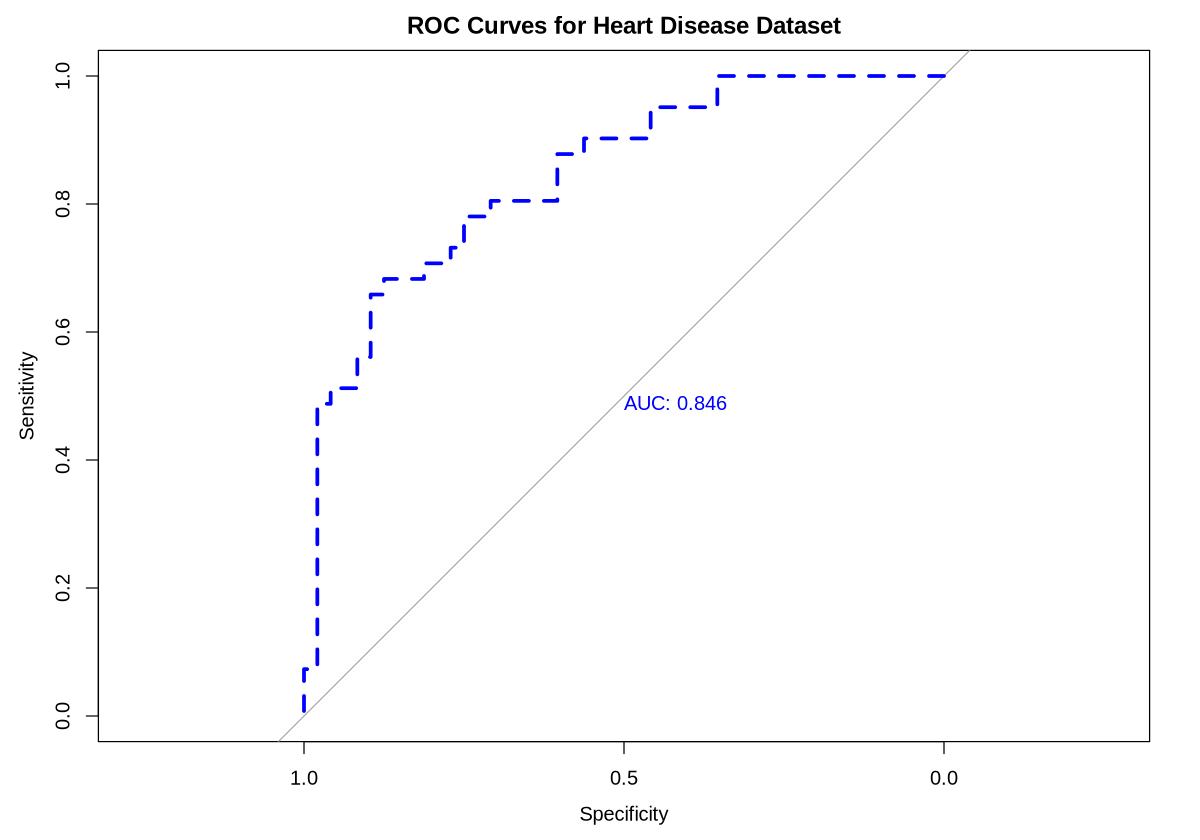

In [ ]:
#ROC plot
# coded by Arav
ROC_full_log <- roc(
  response = heart_disease_test$num,
  predictor = predict(forward_selection_model, heart_disease_test, type="response")
)
plot(ROC_full_log,
print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
   main = "ROC Curves for Heart Disease Dataset")

In the ROC curve plot, the curve rises sharply towards the (1,0) point before spreading out. This shows that the model achieves a high sensitivity with very few false positives. The AUC value of the model is found to be 0.846. This tells that the model can correctly distinguish between positive and negative cases 84.6% of the time. In conclusion, the created logistic regression model is a reliable tool for predicting the presence of heart disease based on the parameters used.

## **(3) Discussion**

Our primary objective was to understand how various clinical factors affect the presence of heart disease. Our logistic regression model helped us to identify the preidcors that are statistically significant as well as their affect on the heart disease diagnosis.

- **Significant Predictors:**

1) Sex (sex1): There is a significant difference in the likelihood of heart disease between males and females.
2) Flat slope of the peak exercise ST segment (slope2): statistically corelated with the heart disease diagnosis.

- **Implications and Impact:**

These findings suggest that being male and specific slopes of the peak exercise ST segment are associated with a higher likelihood of having heart disease. These factors can help clinicians identify patients at higher risk and prioritize them for further testing and preventive measures.

The results align with existing medical knowledge, such as the increased risk of heart disease in males. With that said, age being an insignificant predictor is a surprize, but that could be explained by the fact that most patients in the dataset are over 40 years old. 

- **Model Improvement**

Increasing the size of the database could improve the model's performance and generalizability for the wider population. Most of the predictors selected by forward selection ended up being insignificant, which could be due to the small size of the test set so more insights into the causes of heart disease could be developed provided a larger dataset. Also, adding more clinical factors to the dataset could yeild more relevant predictors.


- **Further Questions / Research**

Studying the long-term effects of preventitive treatments based on the significant predictors of heart disease could improve patient outcomes. Tools for generating personalized risk assessment based on these predictors could help tailor prevention and treatment strategies for patients.

Integrating heart disease prediciton models into clinical practices could assist healthcare providers in identifying high-risk patients early. Early diagnoses can significantly improve chances of recovery and high risk assesments can allow for preventative care such as tiet excercise to be very effective.

- **Conclusion**

Our study demonstrates that specific clinical factors can be used to predict the presence of heart disease. These insights can guide clinical practice and future research with the goal of contributing to improving health care and preventative heart disease treatments.

## **(4) References**
- American Heart Association. (2024, June 5). What is cardiovascular disease?. www.heart.org. https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease

- Booth, S. (2023, January 23). Heart failure: Why early diagnosis matters. WebMD. https://www.webmd.com/heart-disease/heart-failure/early-diagnosis-heart-failure

- Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.